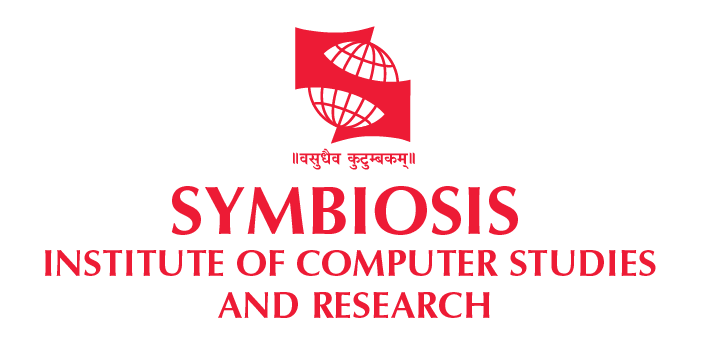

## Riyaz Ali Mavli

Defining the problem statement will be the first step

Objective : Finding reason for low performance of school

Problem Statement: The problem is that the schools are not performing well because of this the impacted the school admissions negatively and  having adverse effect on management, parents and students as well. So the good starting point will be ------ 




In [418]:
#Importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats.stats import pearsonr
import math
from bioinfokit.analys import stat
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [419]:
# Importing the dataset
data_main = pd.read_csv(r"D:\Riyaz Ali Mavli\SICSR\SICSR\SEM 3\MBA - Fundamentals of Data Science\New folder\Dataset\middle_tn_schools.csv")
data = data_main.copy()
data.head(10)

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0
5,Barkers Mill Elementary School,4.0,893.0,48.0,78.1,76.4,13.9,Public,69.4,72.3,64.0,28.6,39.9,2.2,17.8
6,Barksdale Elementary,4.0,580.0,58.0,83.2,74.6,13.8,Public,68.0,76.1,42.0,27.4,59.5,0.5,6.6
7,Beech Elementary,5.0,612.0,16.0,95.2,93.4,15.6,Public,85.9,90.3,39.0,4.2,90.5,0.3,3.1
8,Beech Senior High School,4.0,1274.0,21.0,82.5,77.9,14.9,Public,67.2,69.3,85.0,13.8,79.7,1.4,3.7
9,Bellevue Middle,3.0,680.0,50.0,53.0,55.5,16.5,Public Magnet,55.8,53.3,41.0,24.3,61.8,5.6,6.6


.

### Setting name column as index

In [420]:
data = data.set_index("name")
data

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
name,,,,,,,,,,,,,,
Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winfree Bryant Middle School,3.0,611.0,57.0,59.1,65.2,16.9,Public,61.4,57.7,36.0,15.2,66.3,1.5,15.7
Winstead Elementary School,5.0,515.0,8.0,93.9,97.0,14.3,Public,92.0,89.3,36.0,3.3,87.4,3.1,4.1
Woodland Elementary,4.0,424.0,55.0,84.8,76.7,14.1,Public,69.4,79.4,30.0,11.6,70.5,2.1,9.7


.

# Data Cleaning

### Handling the missing values

In [421]:
data.isnull().sum()

school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    6
stu_teach_ratio        0
school_type            0
avg_score_15           6
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
dtype: int64

<AxesSubplot:ylabel='name'>

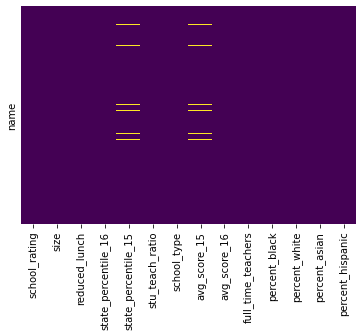

In [422]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [423]:
# Finding out percentage of missing values in each column

percent_miss = (data.isnull().sum() * 100) / len(data)
df_miss = pd.DataFrame({"percentage of missing values": percent_miss})
df_miss

,percentage of missing values
school_rating,0.000000
size,0.000000
reduced_lunch,0.000000
state_percentile_16,0.000000
state_percentile_15,1.729107
stu_teach_ratio,0.000000
school_type,0.000000
avg_score_15,1.729107
avg_score_16,0.000000
full_time_teachers,0.000000


#### Since only 1.73 % data has null values which is not a significant number, therefore we'll drop the null values

In [424]:
# Dropping the null values
data = data.dropna(subset = ["state_percentile_15", "avg_score_15"], axis = 0).copy()

In [425]:
data.isnull().sum()

school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    0
stu_teach_ratio        0
school_type            0
avg_score_15           0
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
dtype: int64

### Finding the outliers

Upper Limit: 126.05834683033554
Lower Limit: -26.216704601596533
Mean value: 49.9208211143695
Median value: 50.0
1st Standard Deviation: 25.379175238655343


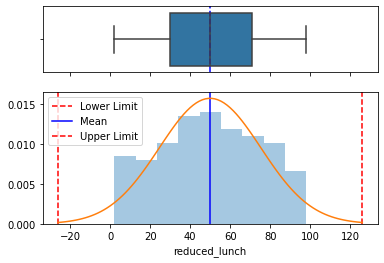

In [426]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.reduced_lunch.median()
rl_mean = data.reduced_lunch.mean()
rl_std = data.reduced_lunch.std()
upper_limit = rl_mean + (3 * rl_std)
lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

sns.boxplot(data["reduced_lunch"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["reduced_lunch"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": lower_limit, "Mean": rl_mean, "Upper Limit": upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

Upper Limit: 156.40008783905506
Lower Limit: -38.27222860151842
Mean value: 59.06392961876831
Median value: 67.6
1st Standard Deviation: 32.445386073428914


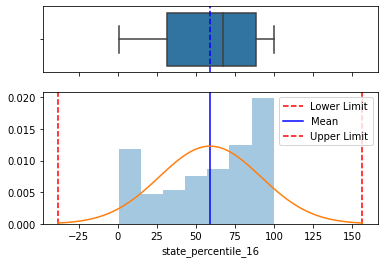

In [427]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.state_percentile_16.median()
rl_mean = data.state_percentile_16.mean()
rl_std = data.state_percentile_16.std()
upper_limit = rl_mean + (3 * rl_std)
lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

sns.boxplot(data["state_percentile_16"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["state_percentile_16"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": lower_limit, "Mean": rl_mean, "Upper Limit": upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

Upper Limit: 156.35715541665354
Lower Limit: -39.85862169231335
Mean value: 58.24926686217009
Median value: 65.8
1st Standard Deviation: 32.702629518161146


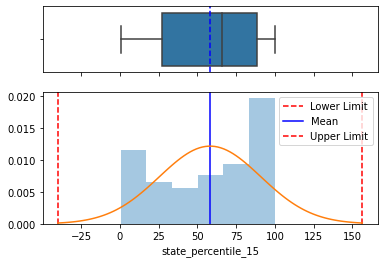

In [428]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.state_percentile_15.median()
rl_mean = data.state_percentile_15.mean()
rl_std = data.state_percentile_15.std()
upper_limit = rl_mean + (3 * rl_std)
lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

sns.boxplot(data["state_percentile_15"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["state_percentile_15"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": lower_limit, "Mean": rl_mean, "Upper Limit": upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

Upper Limit: 32.64492158425253
Lower Limit: -1.7252734904108724
Mean value: 15.459824046920827
Median value: 15.0
1st Standard Deviation: 5.728365845777233


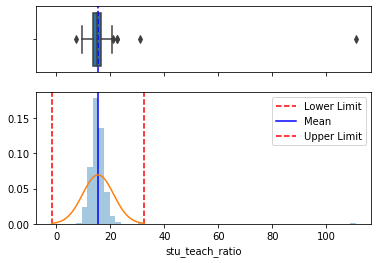

In [429]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.stu_teach_ratio.median()
rl_mean = data.stu_teach_ratio.mean()
rl_std = data.stu_teach_ratio.std()
st_upper_limit = rl_mean + (3 * rl_std)
st_lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {st_upper_limit}")
print(f"Lower Limit: {st_lower_limit}")

sns.boxplot(data["stu_teach_ratio"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["stu_teach_ratio"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(st_lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(st_upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": st_lower_limit, "Mean": rl_mean, "Upper Limit": st_upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

In [430]:
# Finding the outlier(s) for stu_teach_ratio
st_ratio_outlier = data[(data.stu_teach_ratio > st_upper_limit) | (data.stu_teach_ratio < st_lower_limit)]
st_ratio_outlier

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
name,,,,,,,,,,,,,,
Tennessee Online Public School,5.0,222.0,27.0,90.8,62.5,111.0,Public Virtual,60.8,77.8,2.0,8.1,85.6,1.4,1.4


In [431]:
# setting outlier value(s) as na
data["stu_teach_ratio"].values[data["stu_teach_ratio"] > st_upper_limit] = np.nan
data["stu_teach_ratio"].values[data["stu_teach_ratio"] < st_lower_limit] = np.nan

Upper Limit: 137.09404241391672
Lower Limit: -23.084658249693845
Mean value: 57.00469208211145
Median value: 61.8
1st Standard Deviation: 26.696450110601763


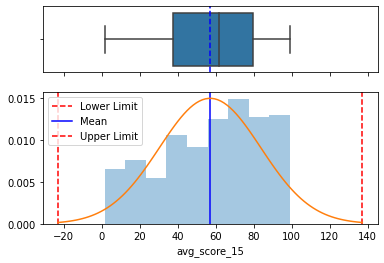

In [432]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.avg_score_15.median()
rl_mean = data.avg_score_15.mean()
rl_std = data.avg_score_15.std()
upper_limit = rl_mean + (3 * rl_std)
lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

sns.boxplot(data["avg_score_15"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["avg_score_15"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": lower_limit, "Mean": rl_mean, "Upper Limit": upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

Upper Limit: 140.8818867444441
Lower Limit: -26.358133078755024
Mean value: 57.26187683284454
Median value: 60.8
1st Standard Deviation: 27.873336637199856


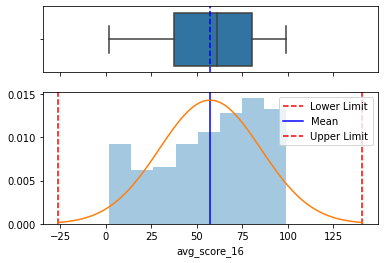

In [433]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.avg_score_16.median()
rl_mean = data.avg_score_16.mean()
rl_std = data.avg_score_16.std()
upper_limit = rl_mean + (3 * rl_std)
lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

sns.boxplot(data["avg_score_16"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["avg_score_16"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": lower_limit, "Mean": rl_mean, "Upper Limit": upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

Upper Limit: 111.37859033825208
Lower Limit: -20.774484766404576
Mean value: 45.302052785923756
Median value: 41.0
1st Standard Deviation: 22.025512517442777


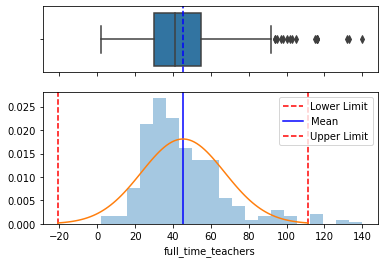

In [434]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.full_time_teachers.median()
rl_mean = data.full_time_teachers.mean()
rl_std = data.full_time_teachers.std()
ftt_upper_limit = rl_mean + (3 * rl_std)
ftt_lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {ftt_upper_limit}")
print(f"Lower Limit: {ftt_lower_limit}")

sns.boxplot(data["full_time_teachers"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["full_time_teachers"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(ftt_lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(ftt_upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": ftt_lower_limit, "Mean": rl_mean, "Upper Limit": ftt_upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

In [435]:
# Finding the outlier(s) for full_time_teachers
ftt_ratio_outlier = data[(data.full_time_teachers > ftt_upper_limit) | (data.full_time_teachers < ftt_lower_limit)]
ftt_ratio_outlier

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
name,,,,,,,,,,,,,,
Blackman High School,4.0,2021.0,25.0,84.8,66.2,17.4,Public,62.1,72.5,116.0,19.6,67.7,5.2,5.8
Dobyns - Bennett High,5.0,2090.0,43.0,96.8,87.0,15.7,Public,73.1,89.2,133.0,6.3,86.3,1.8,3.3
Lavergne High School,2.0,1771.0,59.0,41.7,46.5,15.2,Public,50.3,42.6,116.0,35.0,36.5,3.1,24.6
McGavock High,1.0,2314.0,65.0,19.8,24.7,17.5,Public,36.7,24.8,132.0,37.3,45.5,2.5,13.3
Oakland High School,3.0,1983.0,41.0,57.2,49.5,17.0,Public Magnet,52.0,53.4,116.0,25.1,59.1,3.7,10.0
Riverdale High School,4.0,1864.0,32.0,73.3,65.9,16.2,Public,62.0,62.6,115.0,14.9,71.9,5.8,5.1
Science Hill High School,5.0,2251.0,38.0,96.6,90.6,16.0,Public Magnet,78.5,88.7,140.0,11.3,77.4,1.9,7.3
Siegel High School,3.0,1783.0,28.0,59.8,84.6,15.3,Public,71.3,55.3,116.0,16.8,74.6,2.1,4.7


In [436]:
# setting outlier value(s) as na
data["full_time_teachers"].values[data["full_time_teachers"] > ftt_upper_limit] = np.nan
data["full_time_teachers"].values[data["full_time_teachers"] < ftt_lower_limit] = np.nan

Upper Limit: 90.95096425178615
Lower Limit: -48.93630149518792
Mean value: 21.007331378299114
Median value: 13.5
1st Standard Deviation: 23.314544291162346


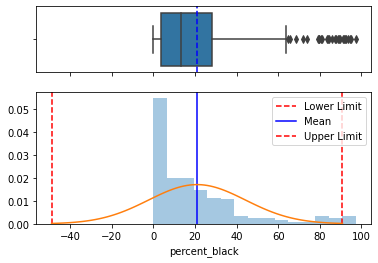

In [437]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.percent_black.median()
rl_mean = data.percent_black.mean()
rl_std = data.percent_black.std()
pb_upper_limit = rl_mean + (3 * rl_std)
pb_lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {pb_upper_limit}")
print(f"Lower Limit: {pb_lower_limit}")

sns.boxplot(data["percent_black"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["percent_black"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(pb_lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(pb_upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": pb_lower_limit, "Mean": rl_mean, "Upper Limit": pb_upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

In [438]:
# Finding the outlier(s) for full_time_teachers
pb_ratio_outlier = data[(data.percent_black > pb_upper_limit) | (data.percent_black < pb_lower_limit)]
pb_ratio_outlier

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
name,,,,,,,,,,,,,,
Buena Vista Elementary,0.0,365.0,81.0,1.3,0.8,13.5,Public Magnet,1.7,4.5,27.0,93.4,1.1,0.3,1.4
Caldwell Elementary,0.0,279.0,83.0,7.5,3.9,10.7,Public Magnet,7.9,12.6,26.0,92.5,3.6,0.0,2.5
Glenn Elementary,0.0,181.0,88.0,4.2,8.9,10.0,Public Magnet,14.3,8.8,18.0,91.7,5.5,0.0,2.8
Haynes Middle,0.0,272.0,82.0,6.7,5.1,16.0,Public,11.3,11.7,17.0,97.4,1.1,0.7,0.7
Jones Elementary,1.0,366.0,65.0,16.4,18.2,15.2,Public Magnet,26.5,24.0,24.0,95.1,2.2,0.5,1.6
Park Avenue Elementary,0.0,521.0,91.0,7.4,10.3,11.3,Public Magnet,15.7,12.7,46.0,94.6,2.7,0.0,1.7
Robert Churchwell Elementary,0.0,520.0,87.0,2.0,1.9,12.0,Public Magnet,4.3,6.1,43.0,91.3,3.7,0.6,2.1
Robert E. Lilliard Elementary,0.0,400.0,92.0,6.7,11.1,14.8,Public Magnet,17.1,12.0,27.0,92.0,3.5,0.8,2.3


In [439]:
# setting outlier value(s) as na
data["percent_black"].values[data["percent_black"] > pb_upper_limit] = np.nan
data["percent_black"].values[data["percent_black"] < pb_lower_limit] = np.nan

Upper Limit: 143.00222888171155
Lower Limit: -19.395190758544345
Mean value: 61.8035190615836
Median value: 68.7
1st Standard Deviation: 27.066236606709314


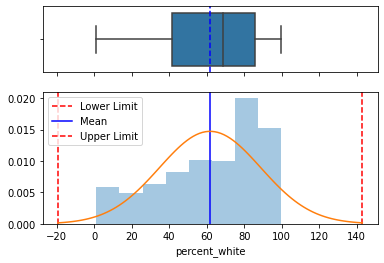

In [440]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.percent_white.median()
rl_mean = data.percent_white.mean()
rl_std = data.percent_white.std()
upper_limit = rl_mean + (3 * rl_std)
lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

sns.boxplot(data["percent_white"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["percent_white"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": lower_limit, "Mean": rl_mean, "Upper Limit": upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

Upper Limit: 12.047688647388245
Lower Limit: -6.707512694309064
Mean value: 2.67008797653959
Median value: 1.6
1st Standard Deviation: 3.125866890282885


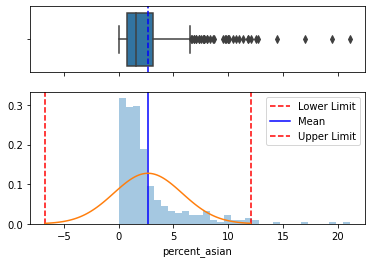

In [441]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.percent_asian.median()
rl_mean = data.percent_asian.mean()
rl_std = data.percent_asian.std()
pa_upper_limit = rl_mean + (3 * rl_std)
pa_lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {pa_upper_limit}")
print(f"Lower Limit: {pa_lower_limit}")

sns.boxplot(data["percent_asian"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["percent_asian"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(pa_lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(pa_upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": pa_lower_limit, "Mean": rl_mean, "Upper Limit": pa_upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

In [442]:
# Finding the outlier(s) for full_time_teachers
pa_ratio_outlier = data[(data.percent_asian > pa_upper_limit) | (data.percent_asian < pa_lower_limit)]
pa_ratio_outlier

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
name,,,,,,,,,,,,,,
Clovercroft Elementary School,5.0,795.0,2.0,99.5,99.6,15.5,Public,95.3,97.7,51.0,2.4,77.2,12.7,4.9
Haywood Elementary,0.0,842.0,94.0,7.0,6.1,14.2,Public,11.3,12.1,59.0,11.3,14.5,12.5,61.3
John Overton High,1.0,1894.0,67.0,17.5,10.7,20.5,Public,23.3,21.4,92.0,22.2,34.2,14.5,28.7
Kenrose Elementary,5.0,820.0,2.0,98.8,98.4,16.4,Public,94.0,96.6,50.0,2.1,68.7,21.1,3.9
McMurray Middle,1.0,740.0,98.0,12.8,6.8,17.6,Public,13.6,21.4,42.0,11.9,18.2,19.5,50.0
Sunset Elementary School,5.0,779.0,7.0,96.2,97.7,16.2,Public,93.6,91.9,48.0,5.9,73.6,12.1,4.4
Tusculum Elementary,0.0,722.0,91.0,1.8,2.6,14.1,Public,5.5,6.1,51.0,11.9,17.3,17.0,52.5


In [443]:
# setting outlier value(s) as na
data["percent_asian"].values[data["percent_asian"] > pa_upper_limit] = np.nan
data["percent_asian"].values[data["percent_asian"] < pa_lower_limit] = np.nan

Upper Limit: 47.43344204178646
Lower Limit: -25.060421513927224
Mean value: 11.186510263929618
Median value: 6.4
1st Standard Deviation: 12.08231059261895


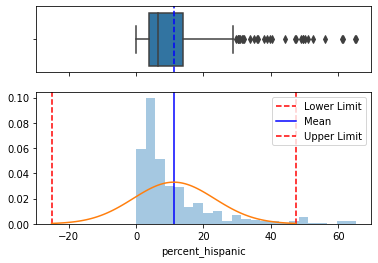

In [444]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (0.5, 1)})

rl_median = data.percent_hispanic.median()
rl_mean = data.percent_hispanic.mean()
rl_std = data.percent_hispanic.std()
ph_upper_limit = rl_mean + (3 * rl_std)
ph_lower_limit = rl_mean - (3 * rl_std)
print(f"Upper Limit: {ph_upper_limit}")
print(f"Lower Limit: {ph_lower_limit}")

sns.boxplot(data["percent_hispanic"], ax = ax_box)
ax_box.axvline(rl_mean, color = 'b', linestyle = '--')

sns.distplot(data["percent_hispanic"], ax = ax_hist, kde = False, norm_hist = True)
ax_hist.axvline(ph_lower_limit, color='r', linestyle = '--')
ax_hist.axvline(rl_mean, color='b', linestyle = '-')
ax_hist.axvline(ph_upper_limit, color='r', linestyle = '--')

plt.legend({'Mean': rl_mean})

ax_box.set(xlabel = '')

x = np.linspace(rl_mean - (3*rl_std), rl_mean + (3*rl_std), 100)
plt.plot(x, norm.pdf(x, rl_mean, rl_std))
plt.legend({"Lower Limit": ph_lower_limit, "Mean": rl_mean, "Upper Limit": ph_upper_limit})
print(f"Mean value: {rl_mean}")
print(f"Median value: {rl_median}")
print(f"1st Standard Deviation: {rl_std}")

plt.show()

In [445]:
# Finding the outlier(s) for full_time_teachers
ph_ratio_outlier = data[(data.percent_hispanic > ph_upper_limit) | (data.percent_hispanic < ph_lower_limit)]
ph_ratio_outlier

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
name,,,,,,,,,,,,,,
Cameron College Preparatory,0.0,587.0,90.0,7.7,16.0,13.9,Public Charter,25.8,13.2,42.0,23.2,25.2,1.9,49.6
Glencliff Elementary,1.0,490.0,86.0,11.7,4.2,14.0,Public,8.3,18.5,35.0,9.4,26.3,1.0,61.2
Glengarry Elementary,0.0,472.0,93.0,1.9,10.2,15.7,Public,15.4,6.0,30.0,17.6,23.7,1.7,56.1
Haywood Elementary,0.0,842.0,94.0,7.0,6.1,14.2,Public,11.3,12.1,59.0,11.3,14.5,NaN,61.3
John B. Whitsitt Elementary,0.0,517.0,89.0,0.6,1.0,13.6,Public,2.4,2.3,38.0,14.1,14.9,2.9,64.8
McMurray Middle,1.0,740.0,98.0,12.8,6.8,17.6,Public,13.6,21.4,42.0,11.9,18.2,NaN,50.0
Norman Binkley Elementary,1.0,510.0,86.0,11.6,13.4,13.7,Public,21.1,18.6,37.0,13.3,26.3,9.8,49.0
Paragon Mills Elementary,0.0,920.0,86.0,4.3,5.6,15.3,Public,10.9,8.5,60.0,27.5,14.3,6.0,50.9
STEM Preparatory Academy,3.0,420.0,55.0,68.6,90.8,14.4,Public Charter,80.6,64.5,29.0,16.7,16.7,1.4,65.2


In [446]:
# setting outlier value(s) as na
data["percent_hispanic"].values[data["percent_hispanic"] > ph_upper_limit] = np.nan
data["percent_hispanic"].values[data["percent_hispanic"] < ph_lower_limit] = np.nan

In [447]:
data.isnull().sum()

school_rating           0
size                    0
reduced_lunch           0
state_percentile_16     0
state_percentile_15     0
stu_teach_ratio         1
school_type             0
avg_score_15            0
avg_score_16            0
full_time_teachers      8
percent_black           8
percent_white           0
percent_asian           7
percent_hispanic       11
dtype: int64

In [448]:
# Dropping the null values from data
data.dropna(inplace = True)

In [449]:
data.isnull().sum()

school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    0
stu_teach_ratio        0
school_type            0
avg_score_15           0
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
dtype: int64

.

# Identifying variables as dependent/output and independent/input variables

In [450]:
output_var = data["school_rating"]
input_var = data.loc[:, data.columns != "school_rating"]

In [451]:
print(f"Input Variable(s)\n\n{list(input_var.columns)} \n\n")
print(f"Output Variable(s) -> {output_var.name}")

Input Variable(s)

['size', 'reduced_lunch', 'state_percentile_16', 'state_percentile_15', 'stu_teach_ratio', 'school_type', 'avg_score_15', 'avg_score_16', 'full_time_teachers', 'percent_black', 'percent_white', 'percent_asian', 'percent_hispanic'] 


Output Variable(s) -> school_rating


In [452]:
output_var.head()

name
Allendale Elementary School    5.0
Anderson Elementary            2.0
Avoca Elementary               4.0
Bailey Middle                  0.0
Barfield Elementary            4.0
Name: school_rating, dtype: float64

In [453]:
input_var.head(5)

,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
name,,,,,,,,,,,,,
Allendale Elementary School,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
Anderson Elementary,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
Avoca Elementary,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
Bailey Middle,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
Barfield Elementary,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


.

### Identifying the datatypes of variables

In [454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, Allendale Elementary School to Woodland Middle School
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school_rating        309 non-null    float64
 1   size                 309 non-null    float64
 2   reduced_lunch        309 non-null    float64
 3   state_percentile_16  309 non-null    float64
 4   state_percentile_15  309 non-null    float64
 5   stu_teach_ratio      309 non-null    float64
 6   school_type          309 non-null    object 
 7   avg_score_15         309 non-null    float64
 8   avg_score_16         309 non-null    float64
 9   full_time_teachers   309 non-null    float64
 10  percent_black        309 non-null    float64
 11  percent_white        309 non-null    float64
 12  percent_asian        309 non-null    float64
 13  percent_hispanic     309 non-null    float64
dtypes: float64(13), object(1)
memory usage: 36.2+ KB


.

# Univariate Analysis

### Dividing the data as categorical and numerical/continuous

In [455]:
data.dtypes

school_rating          float64
size                   float64
reduced_lunch          float64
state_percentile_16    float64
state_percentile_15    float64
stu_teach_ratio        float64
school_type             object
avg_score_15           float64
avg_score_16           float64
full_time_teachers     float64
percent_black          float64
percent_white          float64
percent_asian          float64
percent_hispanic       float64
dtype: object

In [456]:
data.dtypes.value_counts()

float64    13
object      1
dtype: int64

.

### Obtaining statistics of numerical columns

In [457]:
data.describe(exclude = ["object"])

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,3.113269,679.090615,48.417476,61.564078,60.715210,15.195469,59.188350,59.477670,43.754045,19.512298,64.643689,2.392880,9.941748
std,1.596501,348.898943,24.378851,30.835855,31.307128,2.458337,25.230582,26.408147,18.621426,21.283827,25.190137,2.481467,9.110111
min,0.000000,53.000000,2.000000,0.500000,0.600000,7.300000,1.500000,1.900000,3.000000,0.000000,2.600000,0.000000,0.000000
25%,2.000000,424.000000,30.000000,34.900000,31.000000,13.600000,39.600000,39.700000,30.000000,3.300000,47.400000,0.800000,3.900000
50%,3.000000,602.000000,48.000000,69.600000,68.800000,15.000000,63.600000,63.700000,40.000000,12.800000,71.200000,1.600000,6.400000
75%,4.000000,851.000000,66.000000,88.500000,89.000000,16.700000,80.500000,81.800000,54.000000,27.700000,86.400000,2.900000,12.900000
max,5.000000,2025.000000,98.000000,99.800000,99.800000,31.000000,99.000000,98.900000,105.000000,89.700000,99.700000,11.800000,47.400000


.

### Analysing the output variable   --->   school_rating

In [458]:
# Based on value counts
data['school_rating'].value_counts()

4.0    83
5.0    71
3.0    53
2.0    42
1.0    32
0.0    28
Name: school_rating, dtype: int64

In [459]:
# Based on percentage
((data['school_rating'].value_counts() * 100)/data.shape[0]).round(2)

4.0    26.86
5.0    22.98
3.0    17.15
2.0    13.59
1.0    10.36
0.0     9.06
Name: school_rating, dtype: float64

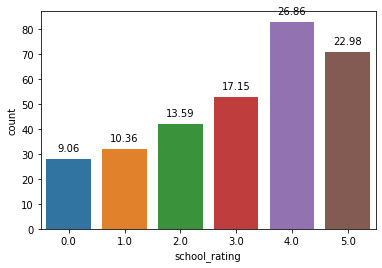

In [460]:
# Visualizing the data
data_length = len(data)
per = sns.countplot(data = data, x = "school_rating")
for i in per.patches:
    high = i.get_height()
    per.text(i.get_x() + i.get_width() / 2, high + 3, ((high/data_length)*100).round(2), ha='center')

#### Inference - Approx 50% of the schools are given high ratings i.e. between 4 and 5

.

In [461]:
# making a copy of the data for the purpose of hypothesis testing
test_data = data.copy()

### Although 'size', 'percent_white', 'percent_black', 'percent_hispanic' is a numerical data but it will be better analyzed when it will be converted into categorical data 

In [462]:
# Converting size of school into categorical variable
# Small <= 600
# Medium > 600 & <= 1200
# Big > 1200

size_conditions = [(data['size'] <= 600), (data['size'] > 600) & (data['size'] <= 1200), (data['size'] > 1200)]
size_values = ['Small', 'Medium', 'Big']


# Converting race percent into categorical variable
# low <= 30
# Medium > 30 & <= 70
# Big > 70

percent_white_conditions = [(data["percent_white"] <= 30.0), (data["percent_white"] > 30.0) & (data["percent_white"] <= 70), (data["percent_white"] > 70)]
percent_white_values = ["Low", "Medium", "High"]

percent_black_conditions = [(data["percent_black"] <= 30.0), (data["percent_black"] > 30.0) & (data["percent_black"] <= 70), (data["percent_black"] > 70)]
percent_black_values = ["Low", "Medium", "High"]

percent_asian_conditions = [(data["percent_asian"] <= 30.0), (data["percent_asian"] > 30.0) & (data["percent_asian"] <= 70), (data["percent_asian"] > 70)]
percent_asian_values = ["Low", "Medium", "High"]

percent_hispanic_conditions = [(data["percent_hispanic"] <= 30.0), (data["percent_hispanic"] > 30.0) & (data["percent_hispanic"] <= 70), (data["percent_hispanic"] > 70)]
percent_hispanic_values = ["Low", "Medium", "High"]

data["size"] = np.select(size_conditions, size_values)
data["percent_white"] = np.select(percent_white_conditions, percent_white_values)
data["percent_black"] = np.select(percent_black_conditions, percent_black_values)
data["percent_asian"] = np.select(percent_asian_conditions, percent_asian_values)
data["percent_hispanic"] = np.select(percent_hispanic_conditions, percent_hispanic_values)


# combining columns state_percentile_16 and state_perecntile_15
df_list = []
for i, j in zip(data["state_percentile_16"], data["state_percentile_15"]):
    df_list.append((i+j)/2)
    
data["state_percentile_16"] = df_list


# combining columns avg_score_16 and avg_score_15
df_list2 = []
for i, j in zip(data["avg_score_16"], data["avg_score_15"]):
    df_list2.append((i+j)/2)
    
data["avg_score_16"] = df_list2

del data["state_percentile_15"]
del data["avg_score_15"]

data.rename(columns = {"state_percentile_16": "state_percentile", "avg_score_16": "avg_score"}, inplace = True)


data

,school_rating,size,reduced_lunch,state_percentile,stu_teach_ratio,school_type,avg_score,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
name,,,,,,,,,,,,
Allendale Elementary School,5.0,Medium,10.0,93.00,15.7,Public,87.30,54.0,Low,High,Low,Low
Anderson Elementary,2.0,Small,71.0,35.05,12.8,Public,40.65,32.0,Low,High,Low,Low
Avoca Elementary,4.0,Small,43.0,81.00,16.6,Public,74.35,29.0,Low,High,Low,Low
Bailey Middle,0.0,Small,91.0,1.30,13.1,Public Magnet,3.25,30.0,High,Low,Low,Low
Barfield Elementary,4.0,Medium,26.0,87.25,14.8,Public,80.45,64.0,Low,High,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
Wilson Elementary School,4.0,Medium,25.0,86.80,14.5,Public,80.30,55.0,Low,High,Low,Low
Winfree Bryant Middle School,3.0,Medium,57.0,62.15,16.9,Public,59.55,36.0,Low,Medium,Low,Low
Winstead Elementary School,5.0,Small,8.0,95.45,14.3,Public,90.65,36.0,Low,High,Low,Low


In [463]:
data["size"].value_counts()

Small     154
Medium    128
Big        27
Name: size, dtype: int64

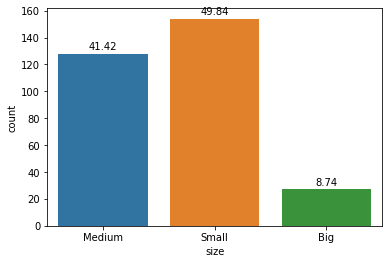

In [464]:
# Visualizing the data
data_length = len(data)
per = sns.countplot(data = data, x = "size")
for i in per.patches:
    high = i.get_height()
    per.text(i.get_x() + i.get_width() / 2, high + 3, ((high/data_length)*100).round(2), ha='center')

#### Inference: 50% of the schools are small in size, 40% of the schools are of medium size whereas only 10% schools are big.

.

In [465]:
data['school_type'].value_counts()

Public            268
Public Magnet      37
Public Charter      4
Name: school_type, dtype: int64

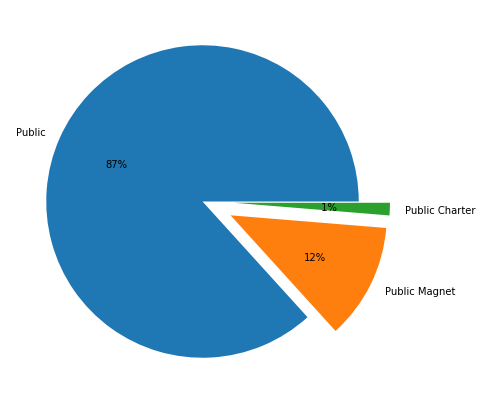

In [466]:
# Visualizing the data
plt.figure(figsize = (7, 10))
plt.pie(data['school_type'].value_counts(), explode = [0, 0.2, 0.2], labels = data['school_type'].unique(), autopct='%2.0f%%')
plt.show()

#### Inference : 87% i.e. the majority of the schools falls in te category "Public"

# Bivariate Analysis

**HYPOTHESIS CONSIDERED**

H0: School type is not affecting the ratings of the school<br>
H1: School type is affecting the ratings of the school

Variables under study:
1. school_type -> categorical
2. school_rating -> taken as categorical here

Since both variables are categorical, so bar plot is used

Public            268
Public Magnet      37
Public Charter      4
Name: school_type, dtype: int64 



school_type     school_rating
Public          4.0              79
                5.0              58
                3.0              47
                2.0              41
                1.0              29
                0.0              14
Public Charter  4.0               2
                5.0               2
Public Magnet   0.0              14
                5.0              11
                3.0               6
                1.0               3
                4.0               2
                2.0               1
Name: school_rating, dtype: int64 





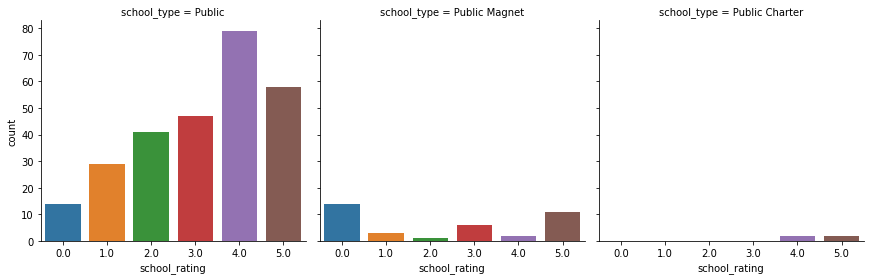

In [467]:
print(data["school_type"].value_counts(), "\n\n\n")
print(data.groupby("school_type")["school_rating"].value_counts(), "\n\n\n")
sns.catplot(x = 'school_rating', col = 'school_type', data = data, kind = 'count', height = 4, aspect = 1)

#### Inference : We can see from the above that:
####             Public Charter type schools have a high rating only i.e. they are performing well
####             Public Magnet type schools have a extreme ratings i.e. some schools are performing really well while some are performing equally worse
####             Public type schools : 31% have low rating, 18% have average rating, 51% have a high rating i.e. more than half of the schools are performing well but a significant number of schools are not performing well

### In order to check the null hypothesis we will use non parametric test as both the variables are categorical. Here chi-square test is applied.

In [468]:
cross_tab = pd.crosstab(data["school_type"], data["school_rating"])
result = stat()
result.chisq(df = cross_tab)
print(f"Observed Values\n\n{cross_tab}\n\n\n")
print(f"Expected Values\n{result.expected_df}")
print(result.summary)

Observed Values

school_rating   0.0  1.0  2.0  3.0  4.0  5.0
school_type                                 
Public           14   29   41   47   79   58
Public Charter    0    0    0    0    2    2
Public Magnet    14    3    1    6    2   11



Expected Values

Expected frequency counts

         0.0        1.0        2.0        3.0       4.0        5.0
--  --------  ---------  ---------  ---------  --------  ---------
 0  24.2848   27.754     36.4272    45.9676    71.9871   61.5793
 1   0.36246   0.414239   0.543689   0.686084   1.07443   0.919094
 2   3.35275   3.83172    5.02913    6.34628    9.93851   8.50162


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson           10       54.2899  4.28479e-08
Log-likelihood    10       46.1493  1.3476e-06



#### Decision on null hypothesis:
Since the p-value 4.28479e-08 i.e. 0.000000043, is less than the level of significance of 0.05, therefore we reject the null hypothesis and accept the alternate hypothesis that school type do affect school ratings

### ------------------------------------------------------------------

H0: There is no significant positive correlation between state_percentile and school ratings<br>
H1: There is significant positive correlation between state_percentile and school ratings

Here:<br>
    H0: ρ <= 0  &nbsp;&nbsp;&nbsp;(No positive correlation)<br>
    H1: ρ > 0   &nbsp;&nbsp;&nbsp;(Significant Positive correlation)

Variables under study:
1. state_percentile -> numerical
2. school_rating -> taken as numeric here for the purpose of correlation analysis

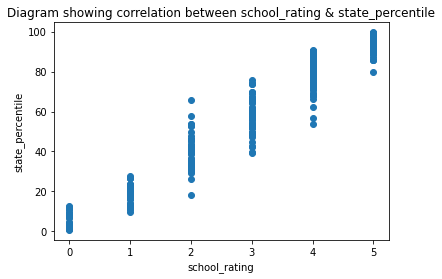

In [469]:
plt.scatter(data["school_rating"], data["state_percentile"])
plt.xlabel("school_rating")
plt.ylabel("state_percentile")
plt.title("Diagram showing correlation between school_rating & state_percentile")
plt.show()

#### Inference : We can see that there is a strong positive correlation between state percentile and school rating i.e. higher the percentile higher is the school rating

### Calculating the correlation coefficient

In [470]:
co_eff_stper, p_val_stper = pearsonr(data["school_rating"], data["state_percentile"])
print(f"Karl Pearson's correlation co-efficient between 'school_rating' and 'state_percentile' is {co_eff_stper.round(2)}")

Karl Pearson's correlation co-efficient between 'school_rating' and 'state_percentile' is 0.97


### In order to check the null hypothesis we will use parametric test as both the variables are numeric. Here we will use t-test based on correlation co-efficient.<br>
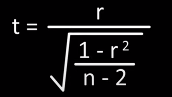
#### level of significance is taken as 5%

In [471]:
# r = 0.98
# n = 309
# degrees of freedom = 309 - 2 = 307
# t critical value at 307 degrees of freedom for right tailed test = 1.6498

deg_free = data.shape[0] - 2
t_stat_stper = co_eff_stper / math.sqrt((1 - (co_eff_stper)**2) / deg_free)
print(f"t statistic = {t_stat_stper}")
print(f"Critical value at 307 degrees of freedom = {1.6498}")

t statistic = 71.69489489946078
Critical value at 307 degrees of freedom = 1.6498


We accept H0 if t statistic < critical value for a right tailed test<br>
We reject H0 if t statistic > critical value for a right tailed test<br>

Since, 71.695 > 1.6498, we reject H0

#### Decision on null hypothesis:
There is enough evidence at 5% level of significance to conclude that there is a significant positive correlation between state_percentile and school_rating<br>

### ------------------------------------------------------------------------------

H0: There is no significant positive correlation between Number of white students and school ratings<br>
H1: There is significant positive correlation between Number of white students and school ratings

Here:<br>
    H0: ρ <= 0  &nbsp;&nbsp;&nbsp;(No positive correlation)<br>
    H1: ρ > 0   &nbsp;&nbsp;&nbsp;(Significant Positive correlation)

Variables under study:
1. percent_white -> categorical (for purpose of visualization)
2. school_rating -> categorical (for purpose of visualization)

Since both variables are categorical, so bar plot is used

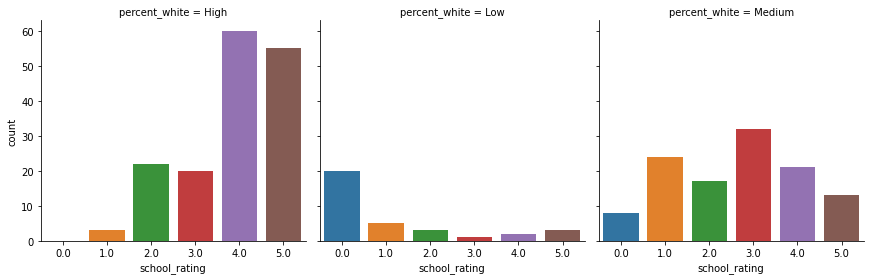

In [472]:
sns.catplot(x = "school_rating", col = "percent_white", data = data, kind = 'count', height = 4, aspect = 1)

#### It is clearly visible from the graphs above that school rating is directly proportional to percentage of white students in the school

### Calculating the correlation coefficient

In [473]:
co_eff_pw, p_val_pw = pearsonr(test_data["school_rating"], test_data["percent_white"])
print(f"Karl Pearson's correlation co-efficient between 'school_rating' and 'percent_white' is {co_eff_pw.round(2)}")

Karl Pearson's correlation co-efficient between 'school_rating' and 'percent_white' is 0.59


Variables under study:
1. percent_white -> taken as numerical for the purpose of conducting test
2. school_rating -> taken as numerical for the purpose of conducting test


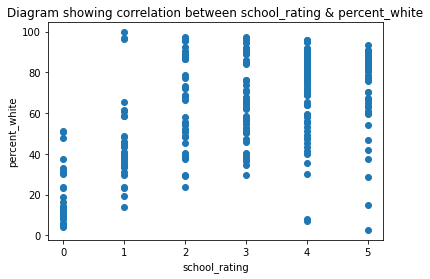

In [474]:
plt.scatter(test_data["school_rating"], test_data["percent_white"])
plt.xlabel("school_rating")
plt.ylabel("percent_white")
plt.title("Diagram showing correlation between school_rating & percent_white")
plt.show()

### In order to check the null hypothesis we will use parametric test as both the variables are numeric. Here we will use t-test based on correlation co-efficient.<br>
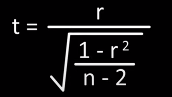
#### level of significance is taken as 5%

In [475]:
# r = 0.93
# n = 309
# degrees of freedom = 309 - 2 = 307
# t critical value at 307 degrees of freedom for right tailed test = 1.6498

t_stat_pw = co_eff_pw / math.sqrt((1 - (co_eff_pw)**2) / deg_free)
print(f"t statistic = {t_stat_pw}")
print(f"Critical value at 307 degrees of freedom = {1.6498}")

t statistic = 12.687747019338655
Critical value at 307 degrees of freedom = 1.6498


We accept H0 if t statistic < critical value for a right tailed test<br>
We reject H0 if t statistic > critical value for a right tailed test<br><br>

Since, 12.69 > 1.6498, we reject H0

#### Decision on null hypothesis:
There is enough evidence at 5% level of significance to conclude that there is a some positive correlation between percent_white and school_rating

### ----------------------------------------------------------------------------------------------

H0: There is no relationship between average_score and school ratings<br>
H1: There is relationship between average_score and school ratings

Here:<br>
    H0: ρ = 0  &nbsp;&nbsp;&nbsp;(No correlation)<br>
    H1: ρ != 0   &nbsp;&nbsp;&nbsp;(Correlation exists)

Variables under study:<br>
1. average_score -> numerical<br>
2. school_rating -> taken as numerical for the purpose of conducting test

Since both variables are numerical, scatter plot will be used

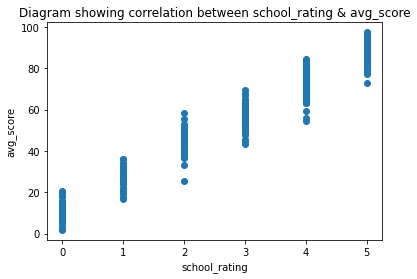

In [476]:
plt.scatter(data["school_rating"], data["avg_score"])
plt.xlabel("school_rating")
plt.ylabel("avg_score")
plt.title("Diagram showing correlation between school_rating & avg_score")
plt.show()

#### Inference : We can see that there is a strong positive correlation between average score and school rating i.e. higher the average score, higher is the school rating

### Calculating the correlation coefficient

In [477]:
co_eff_avgs, p_val_avgs = pearsonr(data["school_rating"], data["avg_score"])
print(f"Karl Pearson's correlation co-efficient between 'school_rating' and 'avg_score' is {co_eff_avgs.round(2)}")

Karl Pearson's correlation co-efficient between 'school_rating' and 'avg_score' is 0.97


### In order to check the null hypothesis we will use parametric test as both the variables are numeric. Here we will use t-test based on correlation co-efficient.<br>
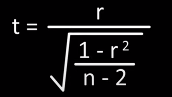
#### level of significance is taken as 5%

In [478]:
# r = 0.97
# n = 309
# degrees of freedom = 309 - 2 = 307
# t critical value at 307 degrees of freedom for two tailed test = 1.9677

t_stat_avgs = co_eff_avgs / math.sqrt((1 - (co_eff_avgs)**2) / deg_free)
print(f"t statistic = {t_stat_avgs}")
print(f"Critical value at 307 degrees of freedom = 1.9677")

t statistic = 72.03378991071831
Critical value at 307 degrees of freedom = 1.9677


We accept H0 if t statistic < critical value for a right tailed test<br>
We reject H0 if t statistic > critical value for a right tailed test<br><br>

Since, 72.034 > 1.9677, we reject H0

#### Decision on null hypothesis:
There is enough evidence at 5% level of significance to conclude that there is a strong correlation between avg_score and school_rating

### -------------------------------------------------------------------------

H0: There is no significant positive correlation between full time teachers and school ratings<br>
H1: There is significant positive correlation between full time teachers and school ratings

Here:<br>
    H0: ρ = 0  &nbsp;&nbsp;&nbsp;(No correlation)<br>
    H1: ρ != 0   &nbsp;&nbsp;&nbsp;(Correlation exists)

Variables under study:<br>
1. average_score -> numerical<br>
2. school_rating -> taken as numerical for the purpose of conducting test

Since both variables are numeric, scatter plot will be used

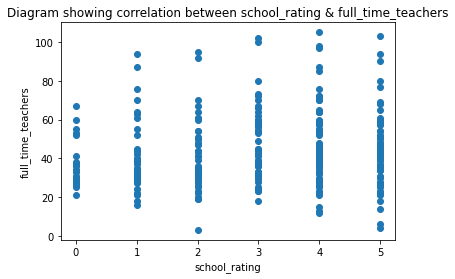

In [479]:
plt.scatter(data["school_rating"], data["full_time_teachers"])
plt.xlabel("school_rating")
plt.ylabel("full_time_teachers")
plt.title("Diagram showing correlation between school_rating & full_time_teachers")
plt.show()

#### Inference : There is no correlation between full_time_teachers and school rating

### Calculating the correlation coefficient

In [480]:
co_eff_ftt, p_val_ftt = pearsonr(data["school_rating"], data["full_time_teachers"])
print(f"Karl Pearson's correlation co-efficient between 'school_rating' and 'full_time_teachers' is {co_eff_ftt.round(2)}")

Karl Pearson's correlation co-efficient between 'school_rating' and 'full_time_teachers' is 0.11


### In order to check the null hypothesis we will use parametric test as both the variables are numeric. Here we will use t-test based on correlation co-efficient.<br>
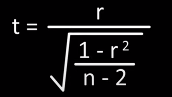
#### level of significance is taken as 5%

In [481]:
# r = 0.11
# n = 309
# degrees of freedom = 309 - 2 = 307
# t critical value at 307 degrees of freedom for two tailed test = 1.9677

t_stat_ftt = co_eff_ftt / math.sqrt((1 - (co_eff_ftt)**2) / deg_free)
print(f"t statistic = {t_stat_ftt}")
print(f"Critical value at 307 degrees of freedom = 1.9677")

t statistic = 1.9379253616700653
Critical value at 307 degrees of freedom = 1.9677


We accept H0 if t statistic < critical value for a right tailed test<br>
We reject H0 if t statistic > critical value for a right tailed test<br><br>

Since, 1.93 < 1.9677, we accept H0

#### Decision on null hypothesis:
There is enough evidence at 5% level of significance to conclude that there is a no correlation between full_time_teachers and school_rating

### -------------------------------------------------------------------------------

# Multi Variate Analysis

### HYPOTHESIS CONSIDERED

H0: size and stu_teach_ratio is not affecting the rating<br>
H1: size and stu_teach_ratio of the school will affect the ratings of the school

<AxesSubplot:xlabel='school_rating', ylabel='stu_teach_ratio'>

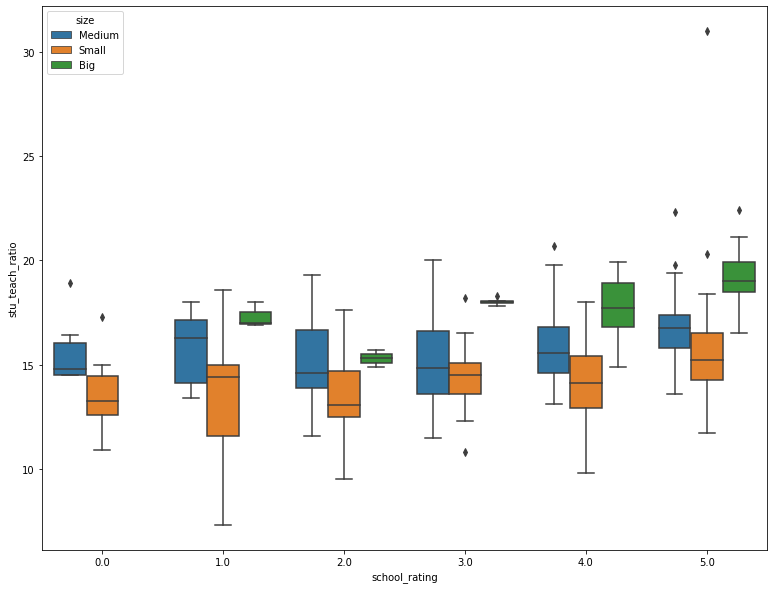

In [482]:
fig, ax1 = plt.subplots(figsize = (13, 10))
sns.boxplot(ax = ax1, x = "school_rating", y = "stu_teach_ratio", hue = "size", data = data)

#### Inference
#### 1. Medium size school's median stu_tech_ratio is higher than small and big size school's stu_teach_ratio who received 0 as school rating.
#### 2. Big size school's median stu_tech_ratio is higher than small and medium size school's stu_teach_ratio who received 1 as school rating.
#### 3. Big size school's median stu_tech_ratio is higher than small and medium size school's stu_teach_ratio who received 2 as school rating.
#### 4. Big size school's median stu_tech_ratio is higher than small and medium size school's stu_teach_ratio who received 3 as school rating.
#### 5. Big size school's median stu_tech_ratio is higher than small and medium size school's stu_teach_ratio who received 4 as school rating.
#### 6. Big size school's median stu_tech_ratio is higher than small and medium size school's stu_teach_ratio who received 5 as school rating.

### Thus we can say that size, stu_teach_ratio together does provide any useful ground of impact on the target variable i.e. school_rating

Text(0, 0.5, 'size')

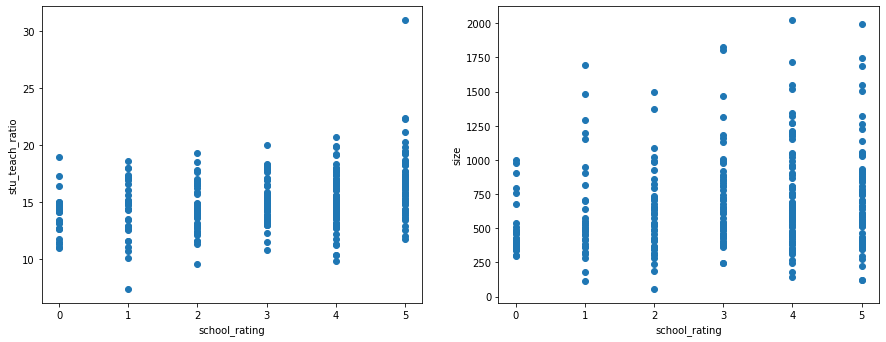

In [483]:
plt.figure(figsize = (15, 12))

plt.subplot(2,2,1)
plt.scatter(data["school_rating"], data["stu_teach_ratio"])
plt.xlabel("school_rating")
plt.ylabel("stu_teach_ratio")

plt.subplot(2,2,2)
plt.scatter(data["school_rating"], test_data["size"])
plt.xlabel("school_rating")
plt.ylabel("size")

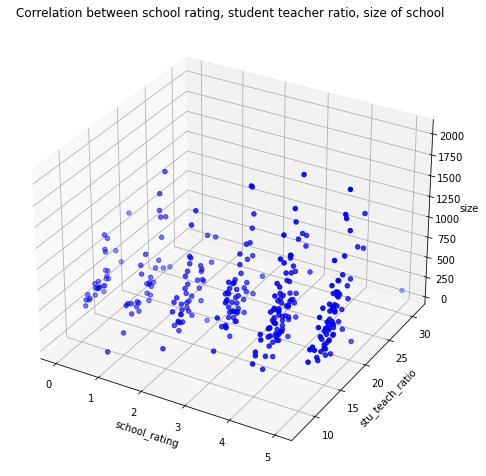

In [484]:
plt.figure(figsize = (8, 20))
ax = plt.axes(projection = "3d")
ax.scatter3D(data["school_rating"], data["stu_teach_ratio"], test_data["size"], color = "blue")
ax.set_xlabel("school_rating")
ax.set_ylabel("stu_teach_ratio")
ax.set_zlabel("size")
plt.title("Correlation between school rating, student teacher ratio, size of school")
plt.show()

In [485]:
corr_coeff_srstr, p_val_srstr = pearsonr(data["school_rating"], data["stu_teach_ratio"])
corr_coeff_srsize, p_val_srsize = pearsonr(data["school_rating"], test_data["size"])
corr_coeff_strsize, p_val_strsize = pearsonr(data["stu_teach_ratio"], test_data["size"])

print(f"Correlation co-efficient : {corr_coeff_srstr}\n")
print(f"Correlation co-efficient : {corr_coeff_srsize}\n")
print(f"Correlation co-efficient : {corr_coeff_strsize}\n")

com_corr_coeff = math.sqrt((pow(corr_coeff_srstr, 2) + pow(corr_coeff_srsize, 2)) - (2 * corr_coeff_srstr * corr_coeff_srsize * corr_coeff_strsize) / (1 - pow(corr_coeff_strsize, 2)))
print(f"Combined correlation coefficient : {com_corr_coeff}")

Correlation co-efficient : 0.33169433162131806

Correlation co-efficient : 0.1804474721474227

Correlation co-efficient : 0.49181415252068406

Combined correlation coefficient : 0.2548039781169596


#### Inference : We can observe from the combined correlation co-efficient that there is very low positive correlation between the three variables

### In order to check the null hypothesis we will use parametric test as both the variables are numeric. Here we will use t-test based on correlation co-efficient.<br>
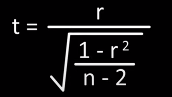
#### level of significance is taken as 5%

In [486]:
# r = 0.255
# n = 309
# degrees of freedom = 309 - 2 = 307
# t critical value at 307 degrees of freedom for two tailed test= 1.9677

t_stat_com = com_corr_coeff / math.sqrt((1 - (com_corr_coeff)**2) / deg_free)
print(f"t statistic = {t_stat_com}")
print(f"Critical value at 307 degrees of freedom = 1.9677")

t statistic = 4.616918247676965
Critical value at 307 degrees of freedom = 1.9677


We accept H0 if t statistic < critical value for a right tailed test<br>
We reject H0 if t statistic > critical value for a right tailed test<br><br>

Since, 4.617 > 1.9677, we reject H0

#### Decision on null hypothesis:
There is some evidence at 5% level of significance to conclude that there is correlation between stu_teach_ratio, size and school_rating. Although we reject the null hypothesis and accept the alternate hypothesis that there is correlation between the three variables but it is also evident from the correlation coefficient that the correlation is close to negligible i.e. 0.25.

## Correlation Analysis

<AxesSubplot:>

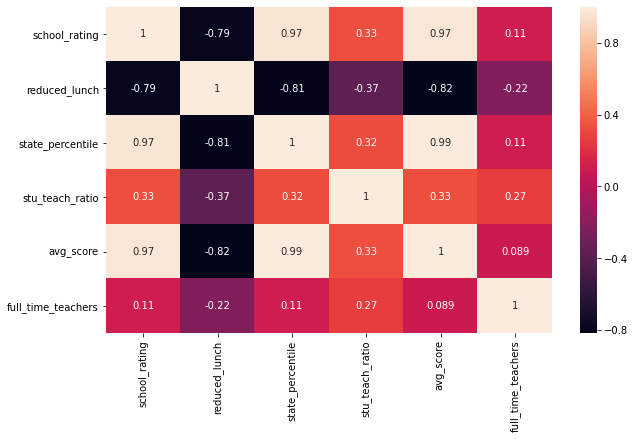

In [487]:
fig, ax = plt.subplots(figsize = (10, 6))
corr = data.corr()
sns.heatmap(data = corr, annot = True)

In [488]:
m = 1

for i in corr.values[1:]:
    for j in i[1:]:
        if abs(j) > 0.9 and j != 1:
            if j.round(2) in corr.iloc[m:m+1].values.round(2):
                print(f"{j.round(2)} -> {corr.iloc[m:m+1].index.values[0]}")
    m += 1

0.99 -> state_percentile
0.99 -> avg_score


In [489]:
corr.drop("state_percentile", inplace = True)
corr.drop("state_percentile", axis = 1, inplace = True)

In [490]:
corr

,school_rating,reduced_lunch,stu_teach_ratio,avg_score,full_time_teachers
school_rating,1.000000,-0.791283,0.331694,0.971669,0.109933
reduced_lunch,-0.791283,1.000000,-0.373610,-0.816119,-0.217642
stu_teach_ratio,0.331694,-0.373610,1.000000,0.330072,0.265523
avg_score,0.971669,-0.816119,0.330072,1.000000,0.088931
full_time_teachers,0.109933,-0.217642,0.265523,0.088931,1.000000


In [491]:
feat_set = set()
for l in range(len(corr)):
    for i, j in zip(corr.iloc[l].values, corr.iloc[l].index):
        if abs(i) > 0.7 and i != 1:
            if j != "school_rating":
                feat_set.add(j)
                
print(f"Selected features : {feat_set}")

Selected features : {'reduced_lunch', 'avg_score'}


Univariate analysis-->

We will do the analysis of single variables 

For example: Height of 10 students in the class, marks of students in the class

Continuous variables: 
 5 point summary (describe function)
 Box-plot, Histogram, Q-Q plots

Categorical variables:
Frequency distribution
Bar plots, Pie charts, frequency tables 

Bi-Variate Analysis-->

Comparisions of two variables

For example: Comparing ice cream with temperature of the day

Categorical variables will be compared with Categorical Variables:
Chi-Square test is used, frequency calculations
Bar charts and stacked bar

Categorical variables will be compared with continous variables: 
T-test (sample size <30) ,  Z-test (sample size > 30) and ANOVA
Factor plot, Violin plot and strip plot

continous to continous variables:
Correlation analysis
Scatter plot, heat map, joint plot, pair plot
If there is predictions, then regression analysis


Multi Variate Analysis-->

More than two variables compared simultaneously

Cluster Analysis, PCA (Principle Component analysis), Correspondance analysis

Reference Link: https://www.youtube.com/watch?v=ulk_JWckJ78

# Model Building

Features selected for model building based on above tests:<br>
    1. avg_core -> high positive correlation = 0.97
    2. reduced_lunch -> high negative correlation = -0.79

## Supervised Learning Algorithms
### Classification

In [492]:
# Importing required modules

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Getting the data ready

In [493]:
x = data[["avg_score", "reduced_lunch"]].values
y = data[["school_rating"]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

Normalizing the data

In [494]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [495]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### 1. Support Vector Machines

In [496]:
clas = svm.SVC(kernel = 'rbf', gamma = 'auto', C = 2)
clas.fit(x_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [497]:
y_pred = clas.predict(x_test)

In [498]:
accuracy_score(y_test, y_pred)

0.8548387096774194

In [499]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 5  0  0  0  0  0]
 [ 1  6  1  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  3  0]
 [ 0  0  0  0 10  4]
 [ 0  0  0  0  0 12]]


In [500]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.75      0.86         8
         2.0       0.91      1.00      0.95        10
         3.0       1.00      0.77      0.87        13
         4.0       0.77      0.71      0.74        14
         5.0       0.75      1.00      0.86        12

    accuracy                           0.85        62
   macro avg       0.88      0.87      0.86        62
weighted avg       0.87      0.85      0.85        62



### 2. Logistic Regression - Cannot be applied

### 3. Naïve Bayes

In [501]:
from sklearn.naive_bayes import GaussianNB

In [502]:
nbo = GaussianNB()
nbo.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [503]:
y_pred_nb = nbo.predict(x_test)

In [504]:
accuracy_score(y_test, y_pred_nb)

0.8225806451612904

In [505]:
confusion_matrix(y_test, y_pred_nb)

array([[ 5,  0,  0,  0,  0,  0],
       [ 0,  5,  3,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0, 10,  3,  0],
       [ 0,  0,  0,  0,  9,  5],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

In [506]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      0.62      0.77         8
         2.0       0.77      1.00      0.87        10
         3.0       1.00      0.77      0.87        13
         4.0       0.75      0.64      0.69        14
         5.0       0.71      1.00      0.83        12

    accuracy                           0.82        62
   macro avg       0.87      0.84      0.84        62
weighted avg       0.85      0.82      0.82        62



### 4. Decision Tree

In [507]:
from sklearn.tree import DecisionTreeClassifier

In [508]:
dt_clas = DecisionTreeClassifier()
dt_clas.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [509]:
y_pred_dt = dt_clas.predict(x_test)

In [510]:
accuracy_score(y_test, y_pred_dt)

0.7903225806451613

In [511]:
confusion_matrix(y_test, y_pred_dt)

array([[ 5,  0,  0,  0,  0,  0],
       [ 0,  6,  2,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  1,  8,  4,  0],
       [ 0,  0,  0,  0,  8,  6],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

In [512]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      0.75      0.86         8
         2.0       0.77      1.00      0.87        10
         3.0       1.00      0.62      0.76        13
         4.0       0.67      0.57      0.62        14
         5.0       0.67      1.00      0.80        12

    accuracy                           0.79        62
   macro avg       0.85      0.82      0.82        62
weighted avg       0.82      0.79      0.79        62



### 5. Random Forest

In [513]:
from sklearn.ensemble import RandomForestClassifier

In [514]:
rf_clas = RandomForestClassifier()
rf_clas.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [515]:
y_pred_rf = rf_clas.predict(x_test)

In [516]:
accuracy_score(y_test, y_pred_rf)

0.7903225806451613

In [517]:
confusion_matrix(y_test, y_pred_rf)

array([[ 5,  0,  0,  0,  0,  0],
       [ 1,  6,  1,  0,  0,  0],
       [ 0,  2,  7,  0,  1,  0],
       [ 0,  0,  2,  8,  3,  0],
       [ 0,  0,  0,  0, 11,  3],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

In [518]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       0.75      0.75      0.75         8
         2.0       0.70      0.70      0.70        10
         3.0       1.00      0.62      0.76        13
         4.0       0.73      0.79      0.76        14
         5.0       0.80      1.00      0.89        12

    accuracy                           0.79        62
   macro avg       0.80      0.81      0.79        62
weighted avg       0.81      0.79      0.79        62



### 6. K-Nearest Neighbours

In [519]:
from sklearn.neighbors import KNeighborsClassifier

In [520]:
k_clas = KNeighborsClassifier()
k_clas.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [521]:
y_pred_kn = k_clas.predict(x_test)

In [522]:
accuracy_score(y_test, y_pred_kn)

0.7741935483870968

In [523]:
confusion_matrix(y_test, y_pred_kn)

array([[ 5,  0,  0,  0,  0,  0],
       [ 1,  5,  2,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  2,  5,  6,  0],
       [ 0,  0,  0,  0, 11,  3],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

In [524]:
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.62      0.77         8
         2.0       0.71      1.00      0.83        10
         3.0       1.00      0.38      0.56        13
         4.0       0.65      0.79      0.71        14
         5.0       0.80      1.00      0.89        12

    accuracy                           0.77        62
   macro avg       0.83      0.80      0.78        62
weighted avg       0.82      0.77      0.76        62



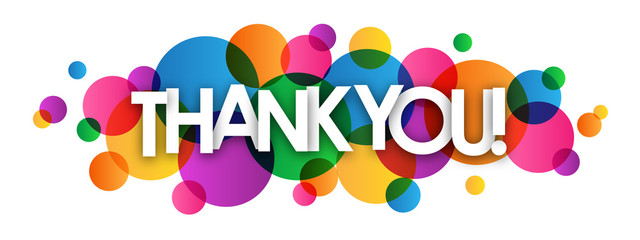